# Lab 2: Transition to Chaos

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Compute "tail-end" of orbit, returning as a list
def compute_quadradit_orbit(c, x_0, iter=1000000, discard=999900):
    f = lambda x: x**2 + c
    orbit = []

    for _ in range(discard):
        x_0 = f(x_0)

    for _ in range(discard, iter):
        x_0 = f(x_0)
        orbit.append(x_0)

    return orbit

In [53]:
# Analyze the tail end of the orbit and return result
def analyze_orbit(orbit, max_period=32, tol=1e-2):
    # Check if orbit approaches a fixed point
    if np.isclose(orbit[-1], orbit[-2], atol=tol):
        return {'type': 'fixed', 'values': [orbit[-1]]}
    
    # Check if orbit approaches a periodic orbit
    for period in range(2, max_period+1):
        if np.allclose(orbit[-period:], orbit[-2*period:-period], atol=tol):
            return {'type': 'periodic', 'values': orbit[-period:]}
        
    # Neither fixed nor periodic, consider chaotic and return range of values
    return {'type': 'chaotic', 'values': orbit}

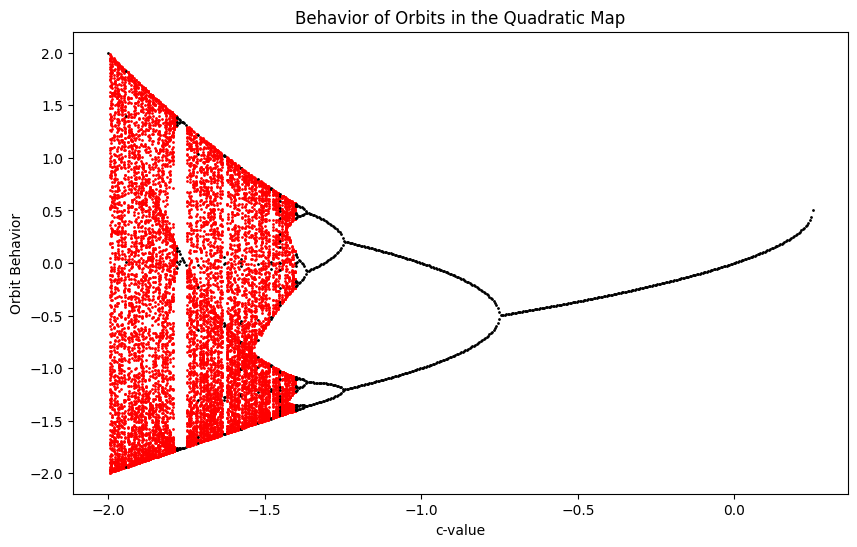

In [54]:
c_values = np.linspace(-2, 0.25, 500)
plt.figure(figsize=(10, 6))

for c in c_values:
    orbit = compute_quadradit_orbit(c, x_0=0)
    result = analyze_orbit(orbit)

    if result['type'] == 'fixed' or result['type'] == 'periodic':
        for val in result['values']:
            plt.plot(c, val, 'ko', markersize=1)
    else:
        for val in result['values']:
            plt.plot(c, val, 'ro', markersize=1)

    # if result['type'] == 'fixed':
    #         plt.plot(c, result['values'], 'bo', markersize=1)  # Fixed points as blue dots
    # elif result['type'] == 'periodic':
    #     for val in result['values']:
    #         plt.plot(c, val, 'go', markersize=1)  # Cycle points as green dots
    # elif result['type'] == 'chaotic':
    #     # Plotting chaotic behavior as a vertical line (or densely packed vertical points)
    #     plt.vlines(c, ymin=result['values'][0], ymax=result['values'][1], colors='r', linewidth=1)

plt.xlabel('c-value')
plt.ylabel('Orbit Behavior')
plt.title('Behavior of Orbits in the Quadratic Map')
plt.show()